In [2]:
import pandas as pd
from geo_utils import filter_france_metr

df_car = pd.read_csv('data/caracteristiques.csv',dtype={'dep':'str','com':'str','code_insee':'str'})
df_car = filter_france_metr(df_car)

df_vehicules = pd.read_csv('data/vehicules.csv')

[Text(0.5, 1.0, 'Accidents de la route par commune')]

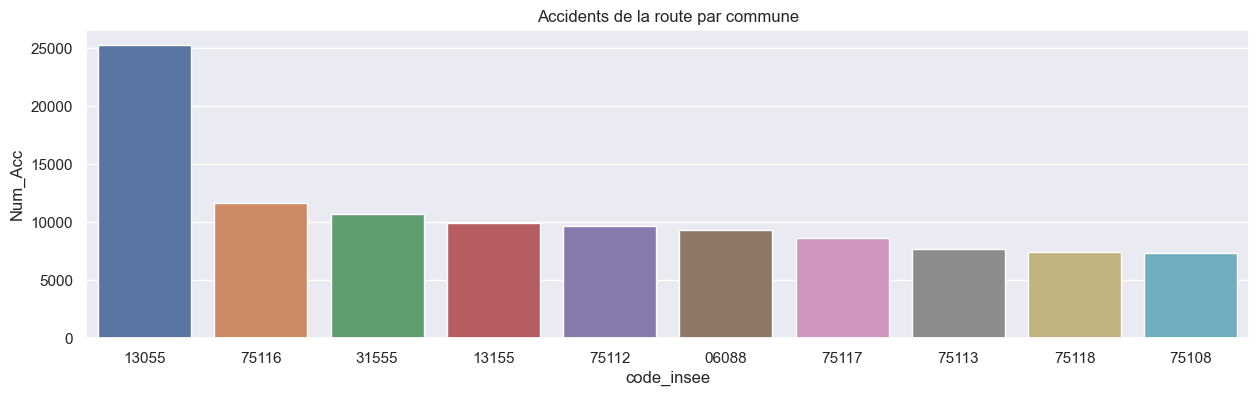

In [3]:
import seaborn as sns
group_com_all = df_car.groupby('code_insee')['Num_Acc'].nunique().sort_values(ascending=False)
df_group_com_all = group_com_all.reset_index().loc[0:9, :]
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(x="code_insee", y="Num_Acc",data=df_group_com_all, linewidth=1, palette="deep").set(title ='Accidents de la route par commune' )

In [4]:
df_velos = df_vehicules[df_vehicules['catv'].isin([1,50,60,80])]

In [5]:
df_accidents_velo = df_car.merge(df_velos,how='inner',on='Num_Acc')

In [6]:
df_accidents_velo.drop_duplicates(subset=['Num_Acc'], keep='last',inplace=True)

In [7]:
df_accidents_velo = filter_france_metr(df_accidents_velo)

[Text(0.5, 1.0, 'Accidents à vélo en métropole')]

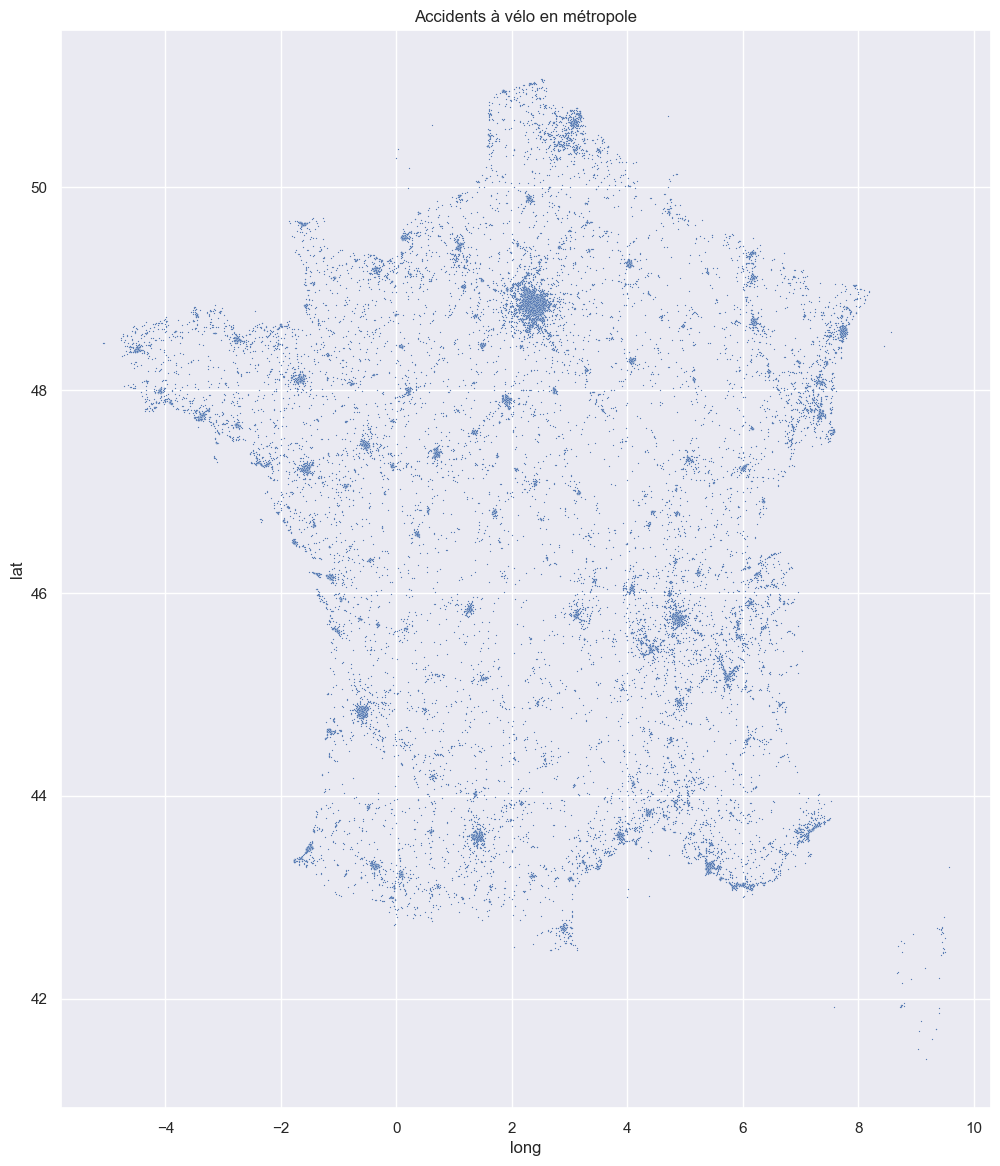

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,14))
sns.scatterplot(data=df_accidents_velo[df_accidents_velo['lat']>40], x="long", y="lat",s=0.9).set(title ='Accidents à vélo en métropole' )

[Text(0.5, 1.0, 'Accidents de vélo par commune')]

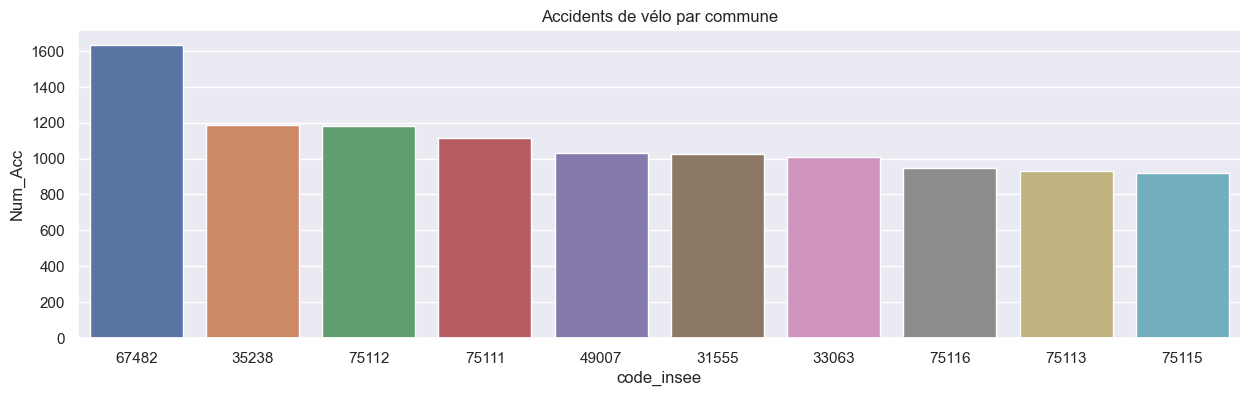

In [9]:
group_com = df_accidents_velo.groupby('code_insee')['Num_Acc'].nunique().sort_values(ascending=False)
df_group_com = group_com.reset_index().loc[0:9, :]
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(x="code_insee", y="Num_Acc",data=df_group_com, linewidth=1, palette="deep").set(title ='Accidents de vélo par commune' )

In [10]:
df_stacked = group_com.reset_index().merge(group_com_all.reset_index(),how='inner',on='code_insee')

In [11]:
df_stacked = df_stacked[df_stacked['Num_Acc_y']>=150]

In [12]:
df_stacked['proportion']=df_stacked['Num_Acc_x']/df_stacked['Num_Acc_y']

In [13]:
df_stacked = df_stacked.sort_values(by='proportion',ascending=False)

[Text(0.5, 1.0, 'Accidentalité à vélo par commune')]

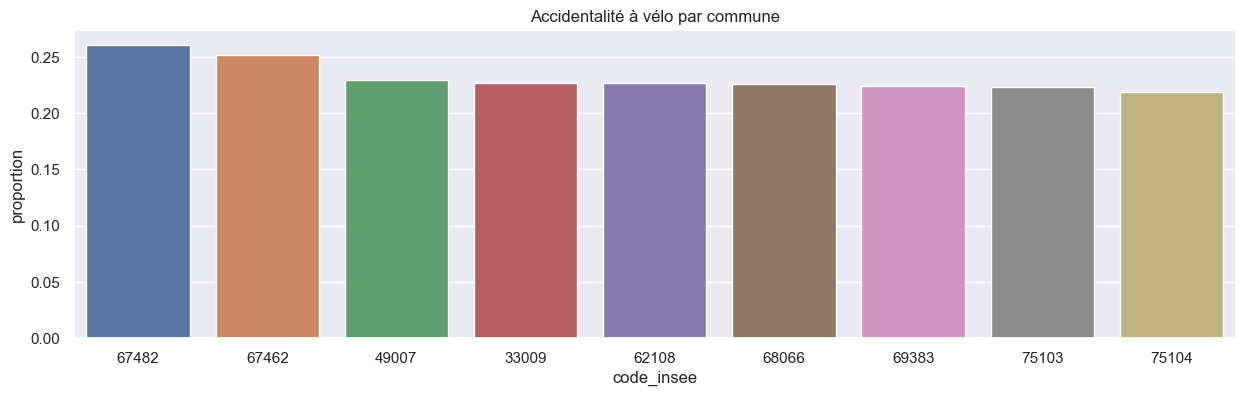

In [14]:
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(x="code_insee", y="proportion",data=df_stacked.iloc[0:9,:], linewidth=1, palette="deep").set(title ='Accidentalité à vélo par commune' )

In [15]:
import json
with open("communes_coordinates.json","r") as json_file:
    mapping_insee_codes_coord = json.load(json_file)
    json_file.close()

In [16]:
import numpy as np
df_stacked['coordinates'] = df_stacked['code_insee'].apply(lambda x: mapping_insee_codes_coord[x])
df_stacked['lon'] = df_stacked['coordinates'].apply(lambda x: x['lon'] if x.get('lon') else np.nan)
df_stacked['lat'] = df_stacked['coordinates'].apply(lambda x: x['lat'] if x.get('lat') else np.nan)

In [17]:
df_stacked.head()

,code_insee,Num_Acc_x,Num_Acc_y,proportion,coordinates,lon,lat
0,67482,1634,6269,0.260648,"{'lon': 7.7621, 'lat': 48.5691}",7.7621,48.5691
223,67462,51,203,0.251232,"{'lon': 7.4588, 'lat': 48.2507}",7.4588,48.2507
4,49007,1032,4502,0.229231,"{'lon': -0.5629, 'lat': 47.4819}",-0.5629,47.4819
191,33009,60,265,0.226415,"{'lon': -1.1719, 'lat': 44.6515}",-1.1719,44.6515
296,62108,38,168,0.226190,"{'lon': 1.581, 'lat': 50.4147}",1.5810,50.4147


[Text(0.5, 1.0, 'Accidentalité à vélo en métropole')]

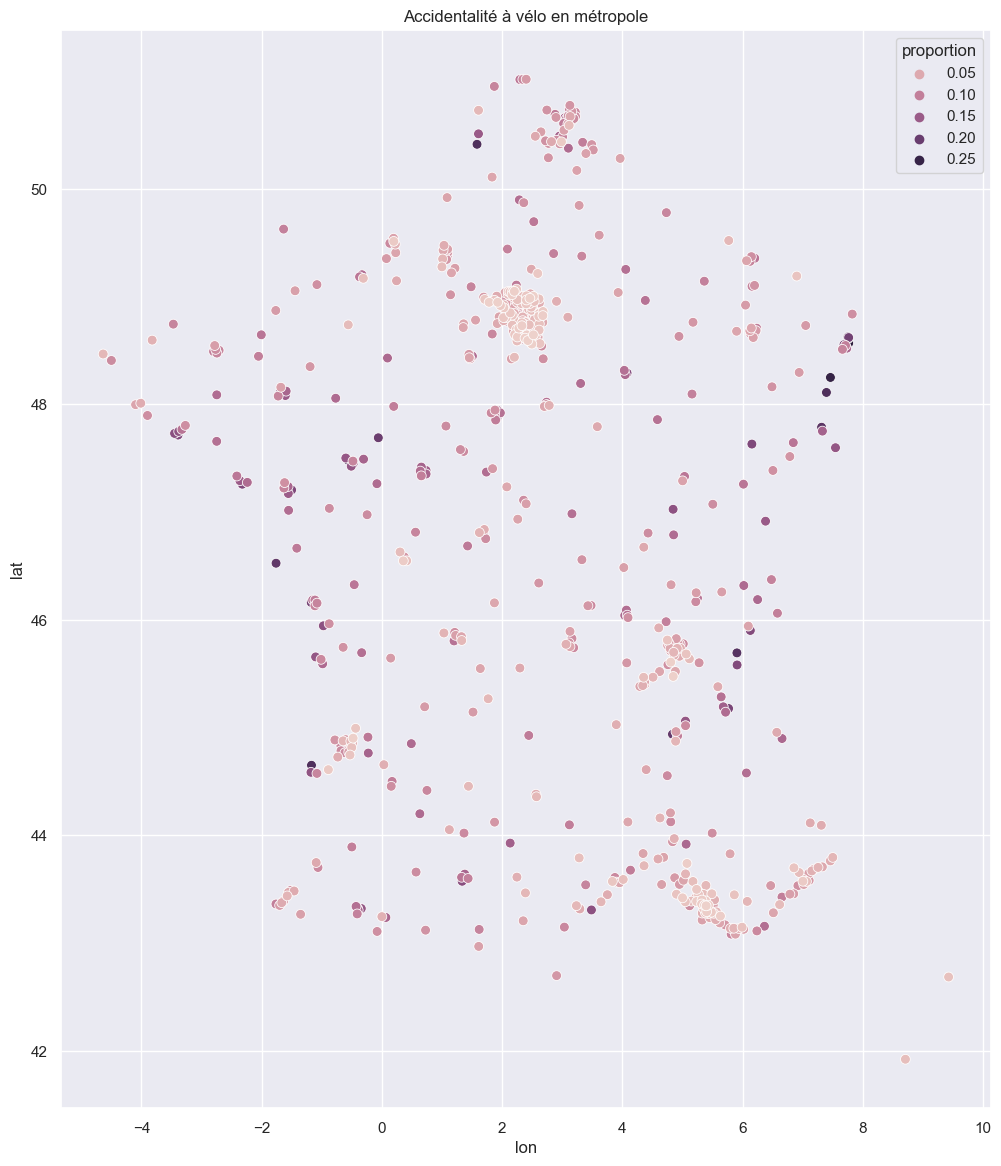

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,14))
sns.scatterplot(data=df_stacked, x="lon", y="lat",s=50, hue='proportion').set(title ='Accidentalité à vélo en métropole' )

In [19]:
df_usagers = pd.read_csv('data/usagers.csv')

In [20]:
df_accidents_velos_gravite = df_accidents_velo.merge(df_usagers, how='inner', on='Num_Acc')

## nombre d'accidents en fonction de la gravité

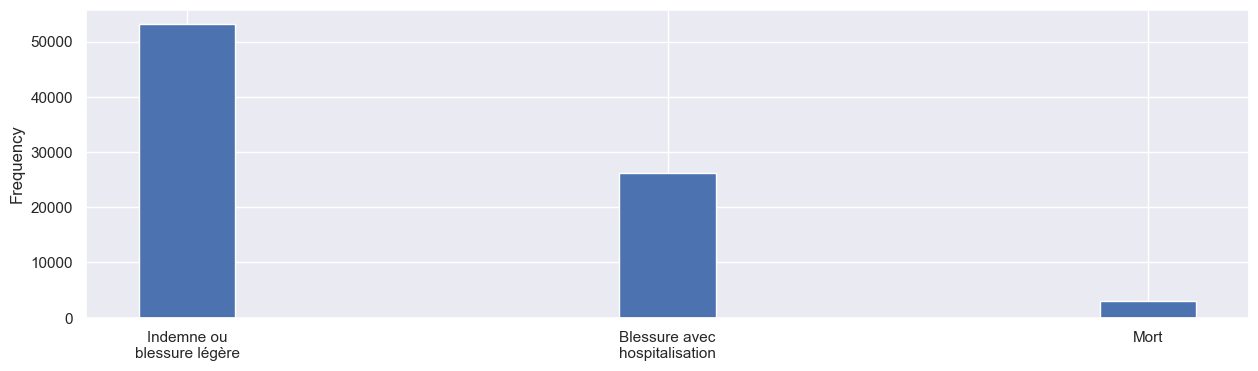

In [61]:
labels_grav = ["Indemne ou\nblessure légère", "Blessure avec\nhospitalisation", "Mort"]
accidents_grav = df_accidents_velos_gravite.groupby('Num_Acc')['grav'].max()
accidents_grav.plot.hist(bins=3,range=(.5,3.5),rwidth=0.2).set_xticks(np.arange(1, 4), labels_grav);

In [37]:
from date_utils import create_date_column,create_dow_column

df_accidents_velo['date'] = create_date_column(df_accidents_velo)
df_car['date'] = create_date_column(df_car)

In [38]:
df_accidents_velo['day_of_week'] = create_dow_column(df_accidents_velo)
df_car['day_of_week'] = create_dow_column(df_car)

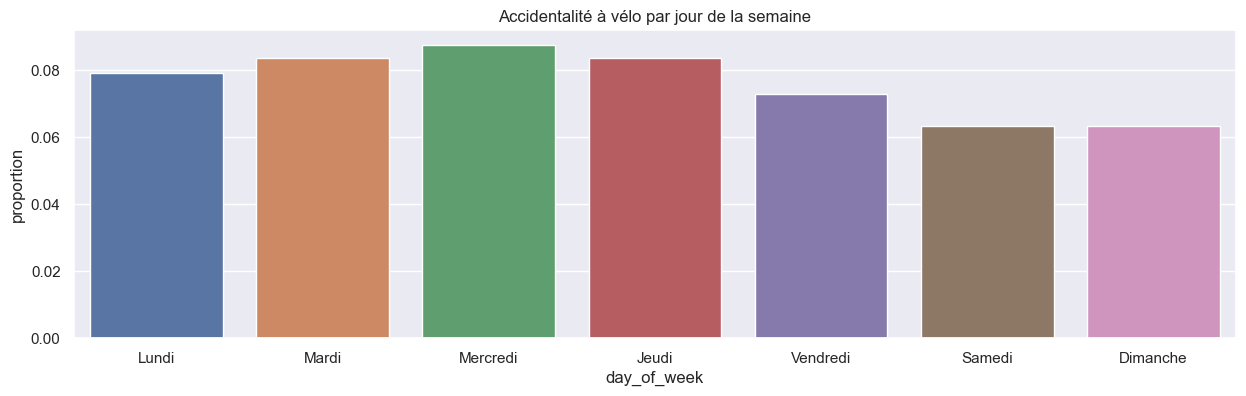

In [40]:
accidents_dow = df_accidents_velo.groupby('day_of_week')['Num_Acc'].nunique()
group_date_all = df_car.groupby('day_of_week')['Num_Acc'].nunique()

df_stacked_date = accidents_dow.reset_index().merge(group_date_all.reset_index(),how='inner',on='day_of_week')
df_stacked_date['proportion']=df_stacked_date['Num_Acc_x']/df_stacked_date['Num_Acc_y']
df_stacked_date = df_stacked_date.sort_values(by='proportion',ascending=False)
#df_stacked_date = df_stacked_date/df_stacked_date.sum()

df_stacked_date = df_stacked_date.reset_index()
sns.set(rc={'figure.figsize':(15,4)})
plot = sns.barplot(x="day_of_week", y="proportion",data=df_stacked_date, linewidth=1, palette="deep")
plot.set(title ="Accidentalité à vélo par jour de la semaine") 
plot.set_xticklabels(["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]);


## Nombre d'accidents de vélo en fonction des conditions d'éclairage

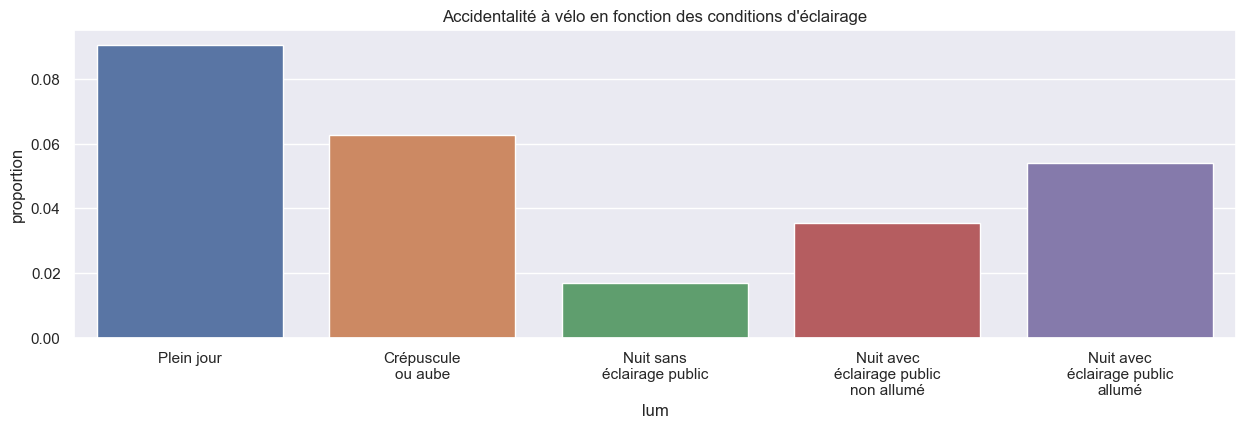

In [42]:
labels_lum = ["Plein jour", "Crépuscule\nou aube", "Nuit sans\néclairage public", "Nuit avec\néclairage public\nnon allumé", "Nuit avec\néclairage public\nallumé"]
df_accidents_lum = df_accidents_velo.groupby('lum')['Num_Acc'].nunique().reset_index()

group_lum_all = df_car.groupby('lum')['Num_Acc'].nunique()

df_stacked_lum = df_accidents_lum.reset_index().merge(group_lum_all.reset_index(),how='inner',on='lum')
df_stacked_lum['proportion']=df_stacked_lum['Num_Acc_x']/df_stacked_lum['Num_Acc_y']

sns.set(rc={'figure.figsize':(15,4)})
plot=sns.barplot(x="lum", y="proportion",data=df_stacked_lum.iloc[1:], linewidth=1)
plot.set_xticklabels(labels_lum)
plot.set(title ="Accidentalité à vélo en fonction des conditions d'éclairage");

L'accidentalité la nuit est moins importante qu'en journée et encore moins sans éclairage public.
Cela peut être lié au fait que les gens sont plus vigilents la nuit et font beaucoup moins attention en journée alors que le danger est plus présent (plus de circulation).
Pour autant, l'accidentalité est reste assez forte durant la nuit, pour un nombre d'accidents très faible : cela semble montrer qu'il y a beaucoup plus d'accidents de vélos par rapport aux accidents de voitures la nuit que normalement, surement due aux restrictions lors de la conduite de voiture (notamment alcool) inexistantes en vélo.

In [43]:
df_lieux = pd.read_csv('data/lieux.csv',low_memory=False)

In [44]:
df_accidents_velo_grav_lieux = accidents_grav.reset_index().merge(df_lieux,how="inner",on="Num_Acc")

## Nombre d'accidents de vélo par gravité en fonction de la localisation

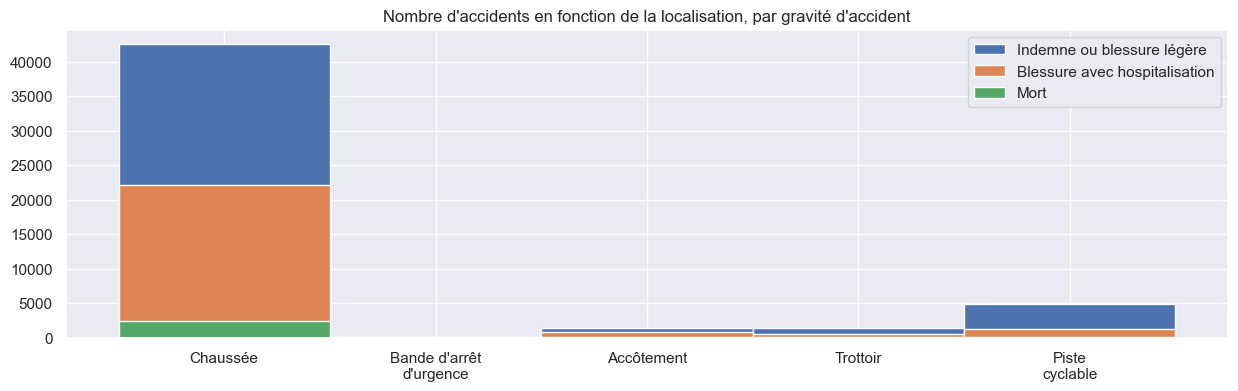

In [60]:
labels_grav_lieux = ["Chaussée","Bande d'arrêt\nd'urgence", "Accôtement", "Trottoir", "Piste\ncyclable"]
fig, ax = plt.subplots()
df_accidents_velo_grav_lieux.groupby('grav')['situ'].hist(legend=False, range=(0.5, 5.5), bins = 5, ax=ax)
ax.set_xticks(np.arange(1, 6), labels_grav_lieux)
ax.legend(["Indemne ou blessure légère", "Blessure avec hospitalisation", "Mort"])
plt.title("Nombre d'accidents en fonction de la localisation, par gravité d'accident",fontsize=12);

La plupart des accidents arrivent sur chaussée, mais la gravité des accidents reste faible proportionnellement parlant
Mettre plus de pistes cyclables à disposition semble donc pertinent

Text(0, 0.5, 'Fréquence')

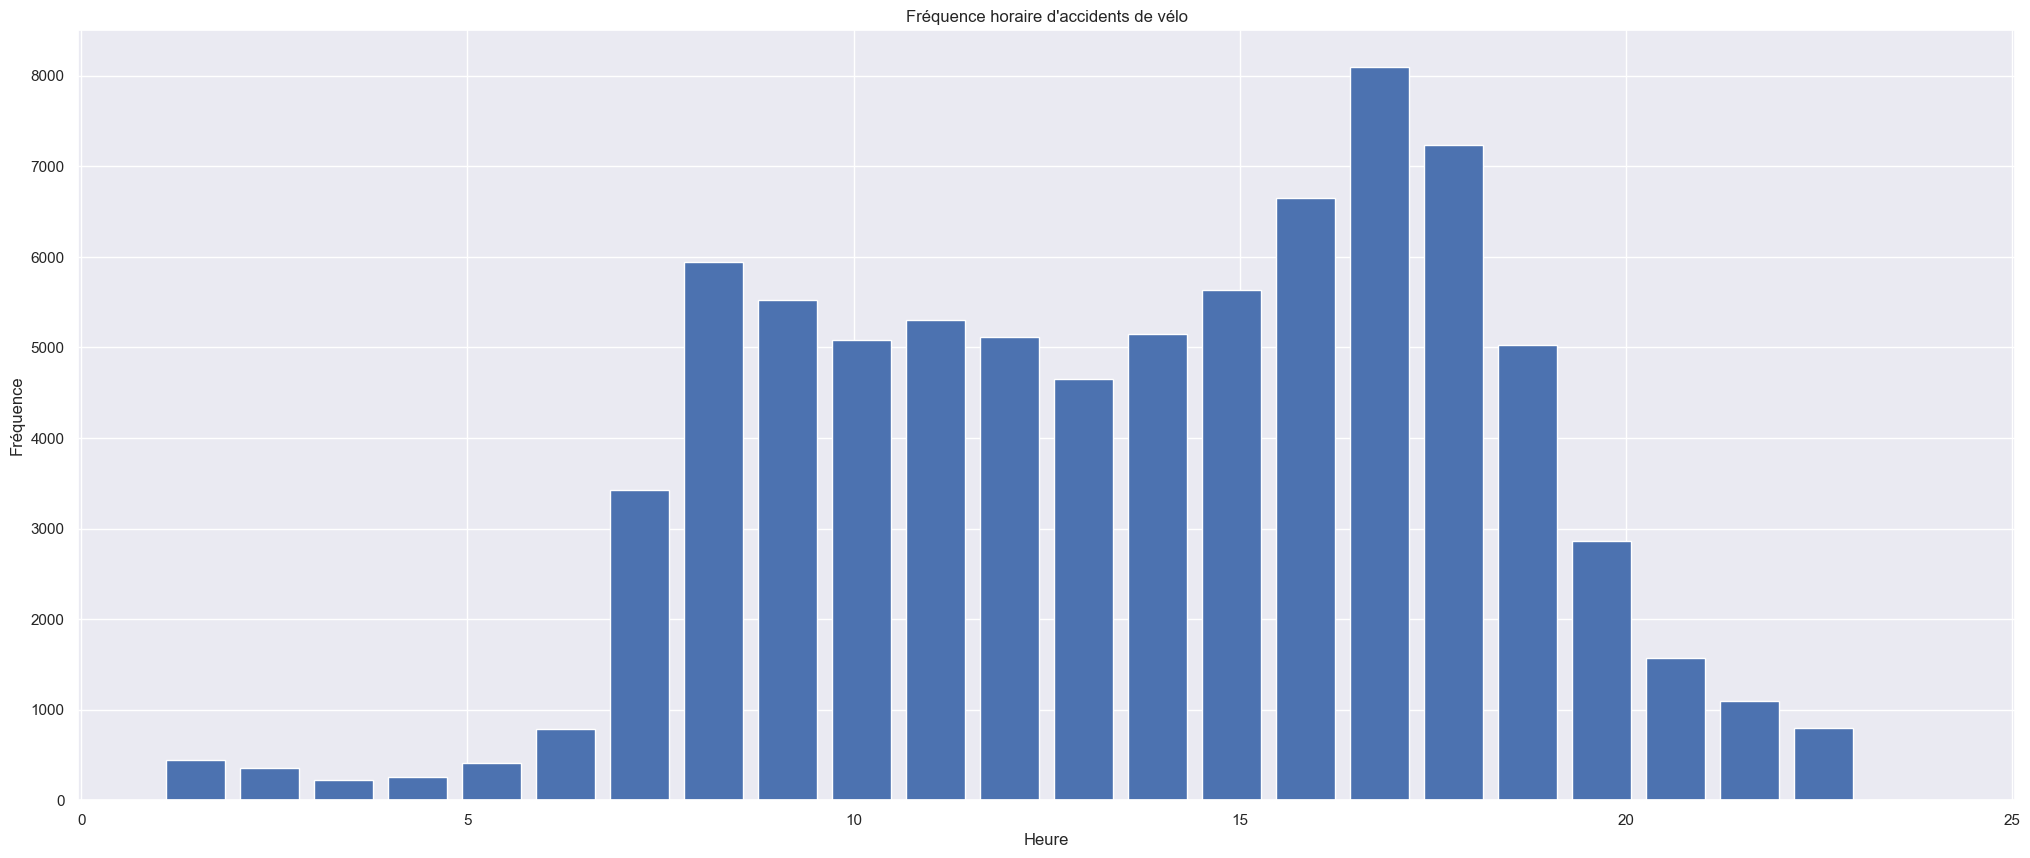

In [63]:
plt.figure(figsize = (25, 10))
plt.title("Fréquence horaire d'accidents de vélo")
df_accidents_velo['hrmn'].apply(lambda x : x[:2]).astype(float).plot.hist(bins = 24, rwidth = 0.8, range=(1, 24))
plt.xlabel('Heure')
plt.ylabel('Fréquence')

### TODO: rajouter le hue pour voir si l'accidentologie suit des patterns heure/gravité

# plus d'accidents vers le matin et encore plus vers le soir 
# => quand les gens sortent du travail le soir ils sont pressés de rentrer chez eux et font moins attention
# => il faut installer + de pistes cyclabes dans les grandes villes pour sécuriser les cyclistes

[Text(0.5, 1.0, "Accidentalité à vélo en fonction de l'heure")]

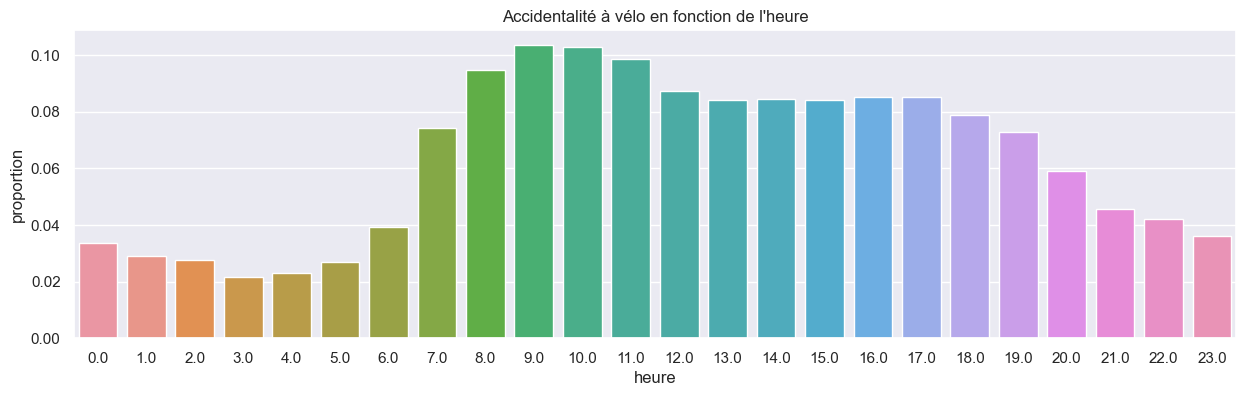

In [64]:
df_accidents_velo['heure'] = df_accidents_velo['hrmn'].apply(lambda x : x[:2]).astype(float)
df_freq_velo = df_accidents_velo.groupby(['heure'])['Num_Acc'].nunique()
#.plot.hist(bins = 24, rwidth = 0.8, range=(1, 24))

df_car['heure'] = df_car['hrmn'].apply(lambda x : x[:2]).astype(float)
group_freq_all = df_car.groupby(['heure'])['Num_Acc'].nunique()

df_stacked_freq = df_freq_velo.reset_index().merge(group_freq_all.reset_index(),how='inner',on='heure')
df_stacked_freq['proportion']=df_stacked_freq['Num_Acc_x']/df_stacked_freq['Num_Acc_y']
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(x="heure", y="proportion",data=df_stacked_freq, linewidth=1).set(title ="Accidentalité à vélo en fonction de l'heure") 


La plupart des accidents ont lieu le matin et il y en a encore plus en fin d'après midi. Globalement, cela peut s'apparenter aux heures d'arrivée au travail et de départ du travail.


Cela peut s'expliquer par le fait que quand les gens sortent du travail, ils sont pressés de rentrer chez eux et font moins attention.


Ainsi, c'est probablement dans les grandes villes ou l'installation de pistes cyclables aura le plus d'intérêt

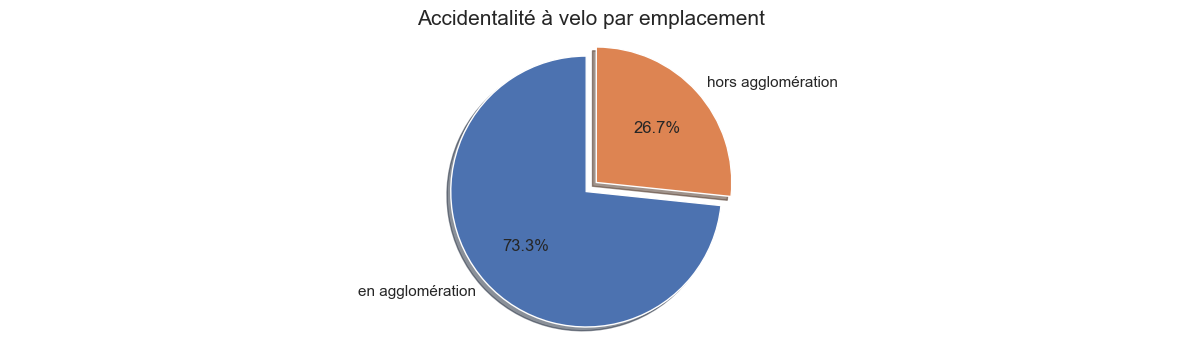

In [65]:
pie_plot = df_accidents_velo.groupby(['agg'])['Num_Acc'].nunique()
group_agg_all = df_car.groupby('agg')['Num_Acc'].nunique()

df_stacked_agg = pie_plot.reset_index().merge(group_agg_all.reset_index(),how='inner',on='agg')
df_stacked_agg['proportion']=df_stacked_agg['Num_Acc_x']/df_stacked_agg['Num_Acc_y']

labels = 'en agglomération', 'hors agglomération'
sizes = [df_stacked_agg.iloc[1]['proportion'], df_stacked_agg.iloc[0]['proportion']]
explode = (0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Accidentalité à velo par emplacement",fontsize=15)
plt.show()

In [66]:
df_accidents_velos_gravite['age'] = df_accidents_velos_gravite['an'] - df_accidents_velos_gravite['an_nais'] 

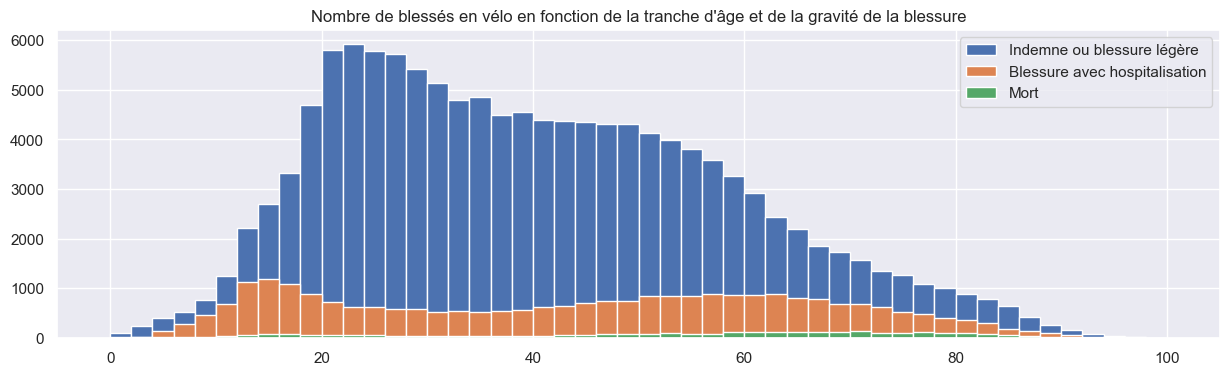

In [69]:
fig, ax = plt.subplots()
df_accidents_velos_gravite.groupby('grav')['age'].hist(legend=False, range=(0, 100), bins = 50, ax=ax)
ax.legend(["Indemne ou blessure légère", "Blessure avec hospitalisation", "Mort"])
plt.title("Nombre de blessés en vélo en fonction de la tranche d'âge et de la gravité de la blessure",fontsize=12);

tranche_age
20 - 39 ans        58692
40 - 59 ans        48974
Moins de 20 ans    22401
Plus de 59 ans     30680
Name: Num_Acc, dtype: int64


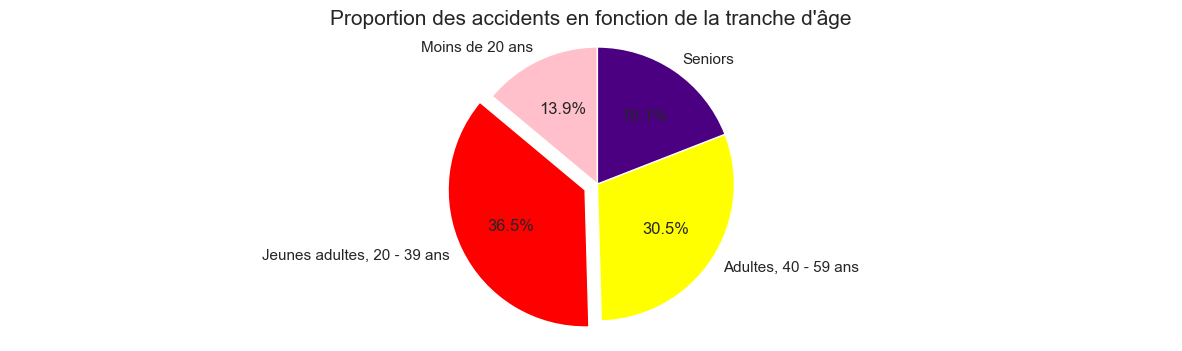

In [70]:
def get_tranche_age(s):
    if s < 20:
        return "Moins de 20 ans"
    elif s < 40:
        return "20 - 39 ans"
    elif s < 60:
        return "40 - 59 ans"
    else :
        return "Plus de 59 ans"
    
df_accidents_velos_gravite["tranche_age"] = df_accidents_velos_gravite["age"].apply(get_tranche_age)


tranche_age = df_accidents_velos_gravite.groupby(["tranche_age"])['Num_Acc'].count()
print(tranche_age)

labels = "Moins de 20 ans", "Jeunes adultes, 20 - 39 ans", "Adultes, 40 - 59 ans", "Seniors"
sizes = [tranche_age["Moins de 20 ans"], tranche_age["20 - 39 ans"], tranche_age["40 - 59 ans"], tranche_age["Plus de 59 ans"]]
explode = (0,0.1,0,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', startangle=90, colors = ['pink', 'red', 'yellow', 'indigo'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Proportion des accidents en fonction de la tranche d'âge",fontsize=15)
plt.show()


In [1]:
df_traffic = pd.read_csv('data/trafic-velos-since-2020.csv',low_memory=False)

In [2]:
df_traffic

,id_compteur,sum_counts,installation_date,postal_code,year,month,day,hour,day_of_week,date
0,100003096-353242251,0.0,2012-02-22,75014,2022,1,1,0,6,2022-01-01
1,100003096-353242251,5.0,2012-02-22,75014,2022,1,1,7,6,2022-01-01
2,100003096-353242251,14.0,2012-02-22,75014,2022,1,1,20,6,2022-01-01
3,100003096-353242251,1.0,2012-02-22,75014,2022,1,2,0,7,2022-01-02
4,100003096-353242251,2.0,2012-02-22,75014,2022,1,2,1,7,2022-01-02
...,...,...,...,...,...,...,...,...,...,...
3090131,300014702-353245971,44.0,2020-11-29,75015,2020,12,31,9,4,2020-12-31
3090132,300014702-353245971,49.0,2020-11-29,75015,2020,12,31,10,4,2020-12-31
3090133,300014702-353245971,52.0,2020-11-29,75015,2020,12,31,13,4,2020-12-31
3090134,300014702-353245971,65.0,2020-11-29,75015,2020,12,31,17,4,2020-12-31


In [3]:
from geo_utils import filter_paris_postcodes
df_traffic = filter_paris_postcodes(df_traffic)

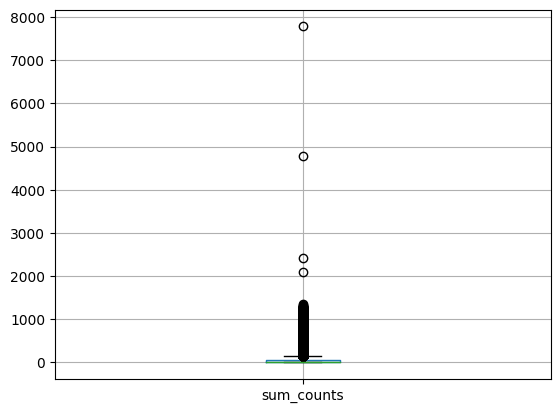

In [12]:
df_traffic[['sum_counts']].boxplot()
plt.show();

In [ ]:
df_traffic.sort_values(by='sum_counts', ascending=False).head(10)

## Evolution du trafic

In [65]:
df_traffic_date = df_traffic[['sum_counts','date']].groupby(by=['date'], as_index=False).mean()

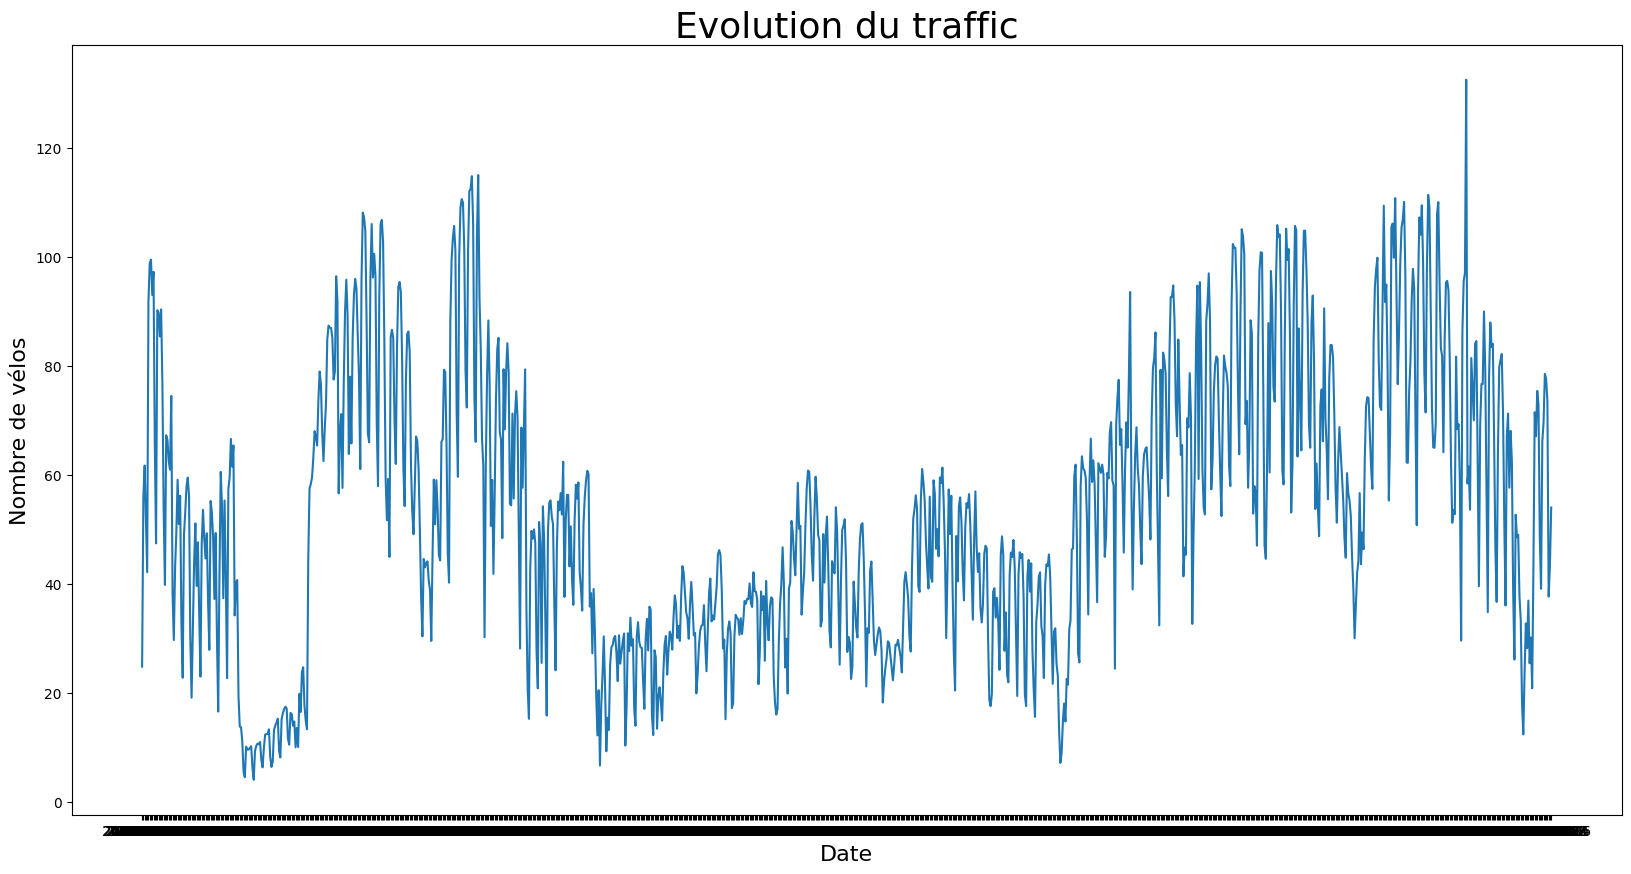

In [67]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_traffic_date, x="date", y="sum_counts")
plt.xlabel('Date', size= 16)
plt.ylabel('Nombre de vélos', size=16)
plt.title('Evolution du traffic', size=26)
plt.show();

## Saisonalité

In [5]:
df_traffic_month = df_traffic[['sum_counts','year','month']].groupby(by=['year','month']).mean()
df_traffic_month = df_traffic_month.unstack().T.droplevel(level=0)

In [6]:
df_traffic_month

year,2020,2021,2022,2023
month,,,,
1,65.002369,24.891714,52.228725,58.736413
2,42.569453,26.975104,61.449583,NaN
3,29.113478,34.491111,70.817959,NaN
4,12.290245,33.073373,69.526576,NaN
5,53.701875,34.149993,78.388193,NaN
6,83.847980,46.541437,83.212795,NaN
7,79.852598,38.241853,75.281538,NaN
8,53.110448,30.209801,58.308606,NaN
9,89.797264,50.441207,89.256001,NaN


<Figure size 2000x1000 with 0 Axes>

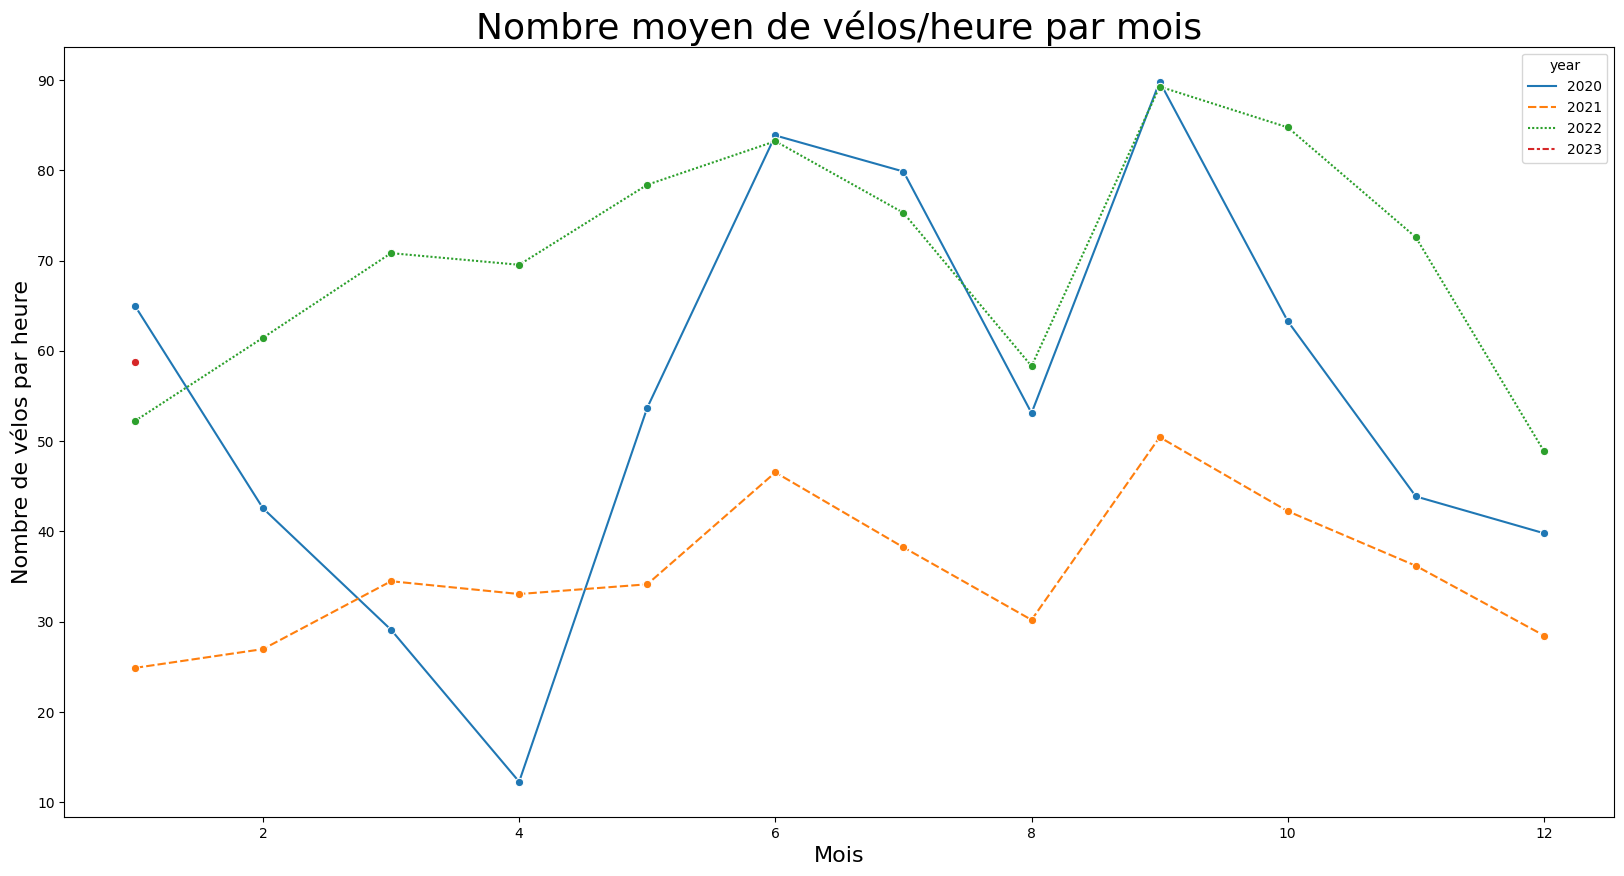

In [11]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_traffic_month, marker="o")
plt.xlabel('Mois', size= 16)
plt.ylabel('Nombre de vélos par heure', size=16)
plt.title('Nombre moyen de vélos/heure par mois', size=26)
plt.show();

On constate une saisonalité annuelle dans le traffic moyen. Le mois d'août est généralement caractérisée par une diminution du trafic de vélos
tandis que le mois de septembre est caractérisé par une augmentation. On note également l'impact du COVID sur le trafic de vélos
avec une forte diminution en avril 2020

## Comparaison du trafic au sein d'une semaine

In [8]:
df_traffic_week = df_traffic[['sum_counts','year','day_of_week']].groupby(by=['year','day_of_week']).mean()
df_traffic_week = df_traffic_week.unstack().T.droplevel(level=0)

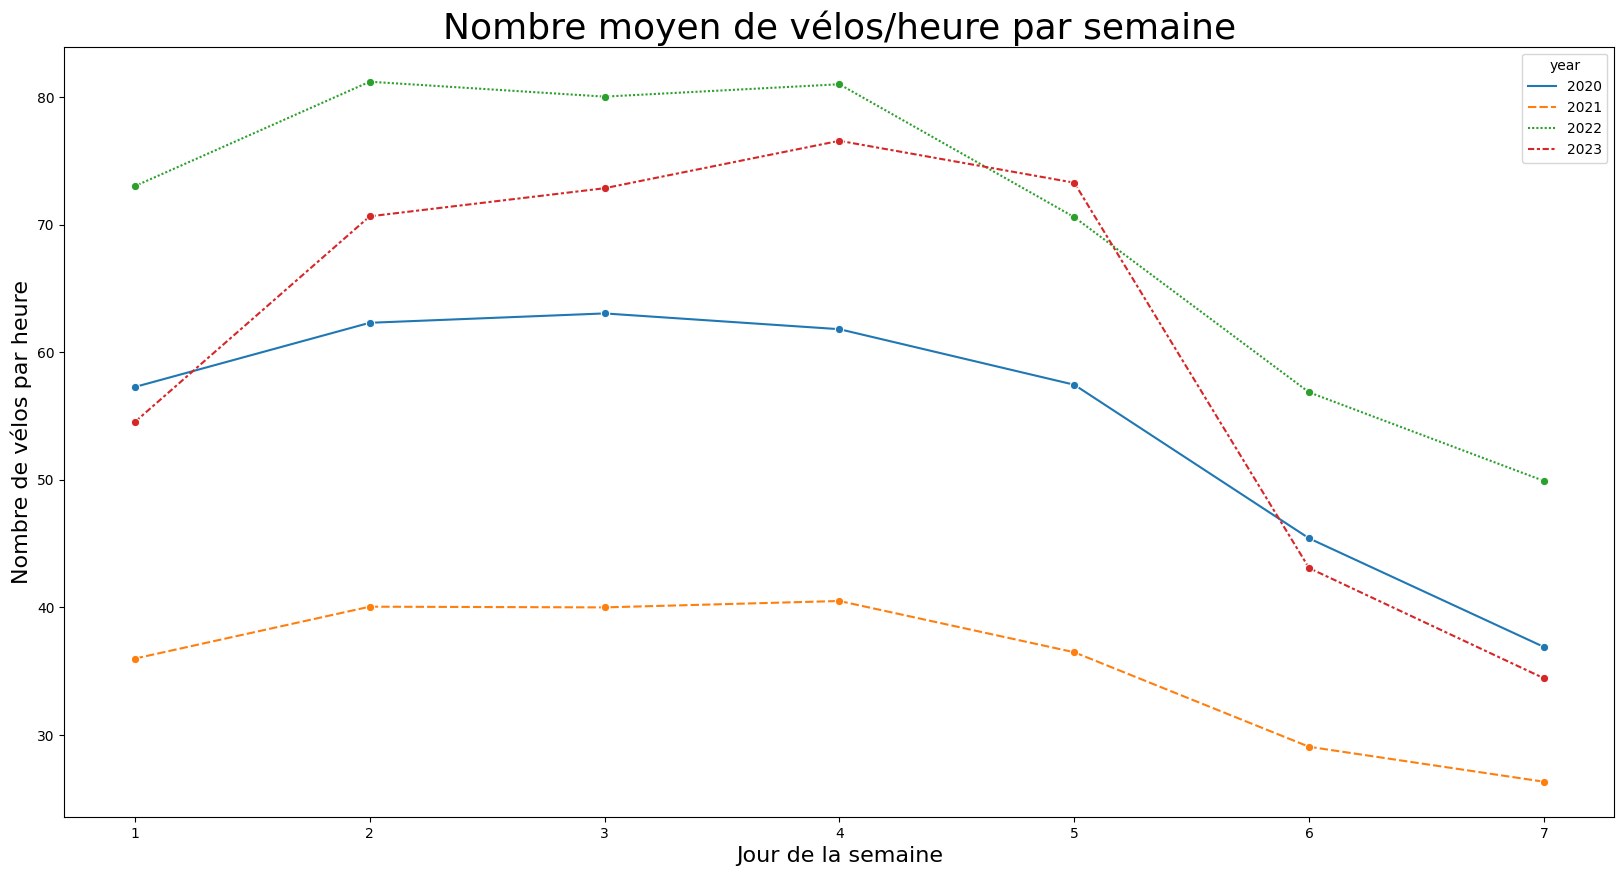

In [13]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_traffic_week, marker="o")
plt.xlabel('Jour de la semaine', size= 16)
plt.ylabel('Nombre de vélos par heure', size=16)
plt.title('Nombre moyen de vélos/heure par semaine', size=26)
plt.show();

On constate une diminution du trafic de vélos les weekend , ce qui laisse penser que la plupart des gens utilisent le vélo comme moyen de transport pour aller au travail plutôt que comme hobby

## Comparaison des arrondissements de Paris

### Quels sont les arrondissements avec le plus gros trafic de vélos en moyenne ?

In [14]:
df_arrondissement = df_traffic[['sum_counts','postal_code']].groupby(by=['postal_code'], as_index=False).mean()

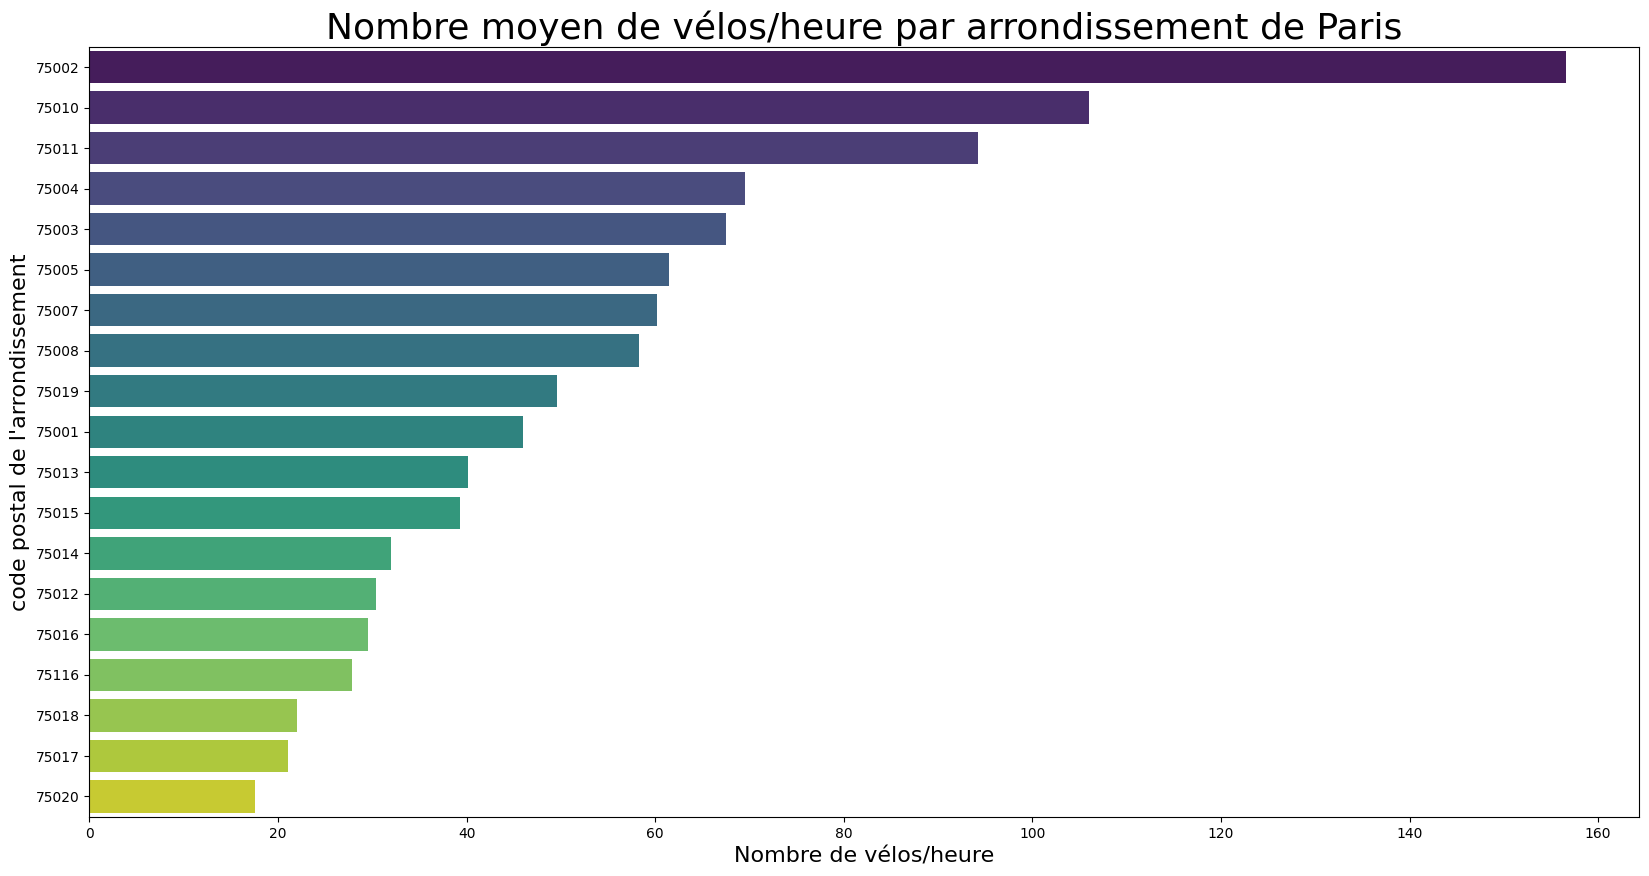

In [15]:
plt.figure(figsize=(20, 10))
sns.barplot(x="sum_counts"
            ,y="postal_code"
            , data=df_arrondissement
            ,orient='h'
            ,order=df_arrondissement.sort_values('sum_counts', ascending=False).postal_code
            ,palette="viridis"
           )
plt.xlabel('Nombre de vélos/heure', size= 16)
plt.ylabel("code postal de l'arrondissement", size=16)
plt.title('Nombre moyen de vélos/heure par arrondissement de Paris', size=26)
plt.show();

In [17]:

df_arrondissement_hour = df_traffic[['sum_counts','postal_code','hour']].groupby(by=['postal_code','hour']).mean()
df_arrondissement_hour = df_arrondissement_hour.unstack().T.droplevel(level=0)

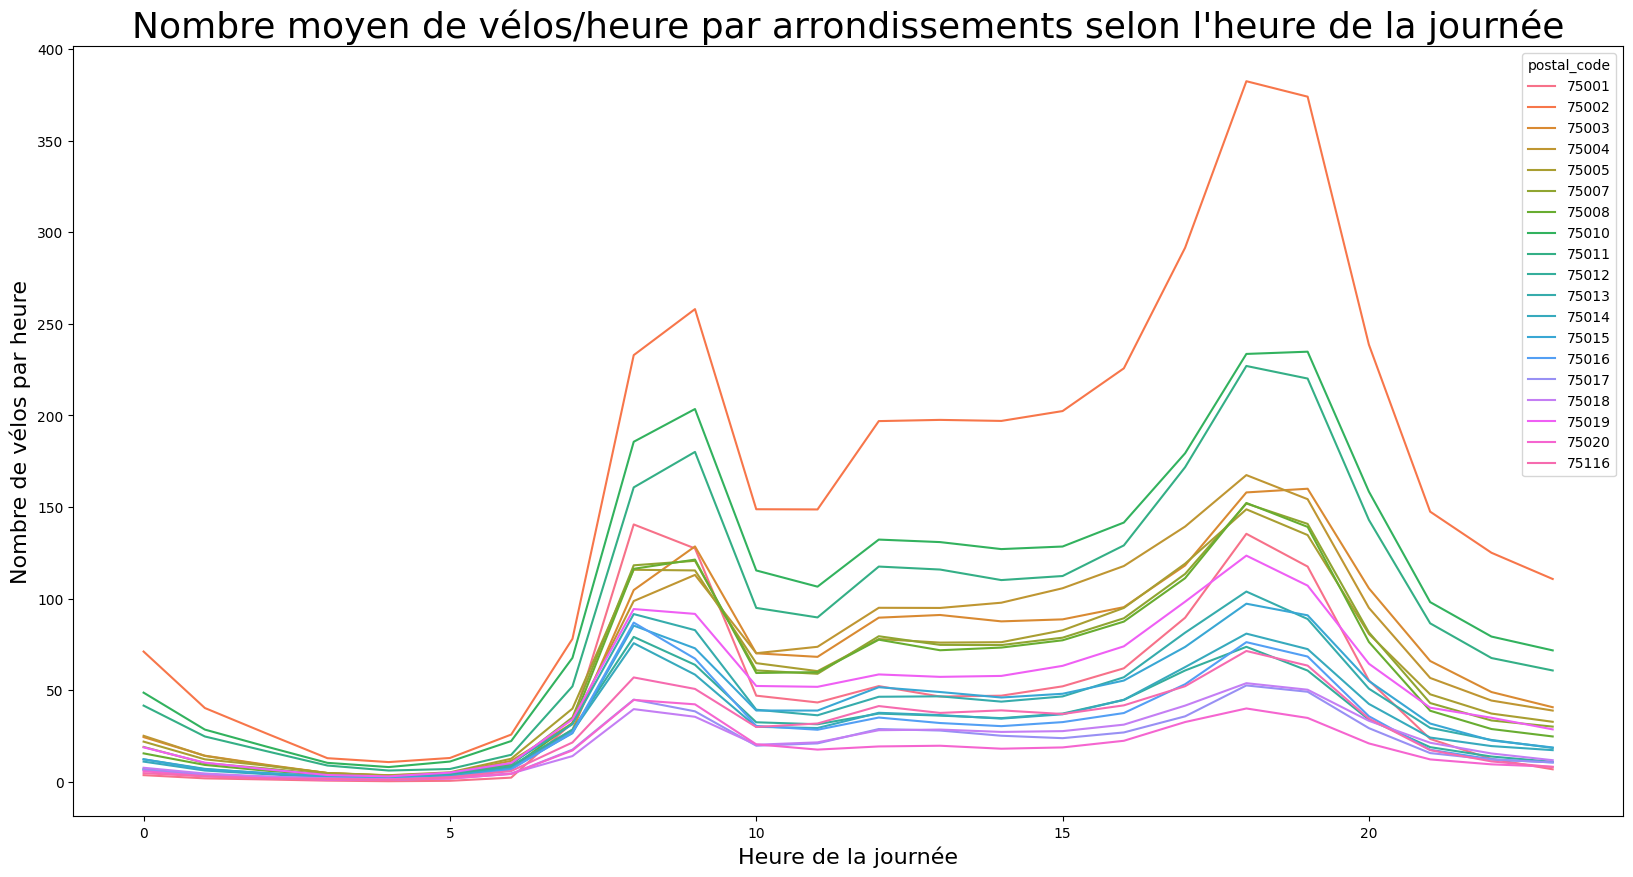

In [23]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_arrondissement_hour, dashes=False)
plt.xlabel('Heure de la journée', size= 16)
plt.ylabel('Nombre de vélos par heure', size=16)
plt.title("Nombre moyen de vélos/heure par arrondissements selon l'heure de la journée", size=26)
plt.show();

In [24]:
df_bike_lanes = pd.read_csv('data/reseau-cyclable.csv', sep=';')

In [29]:
df_bike_lanes['date_de_livraison']=df_bike_lanes.sort_values(by='geo_point_2d')['date_de_livraison'].fillna(method='bfill').fillna(method='ffill')


In [31]:
bike_lanes_per_date =df_bike_lanes.groupby('date_de_livraison').count()['length'].reset_index()
bike_lanes_per_date['date_de_livraison']=pd.to_datetime(bike_lanes_per_date['date_de_livraison'])

In [34]:
bike_lanes_per_date['total_length'] = bike_lanes_per_date['length'].cumsum()

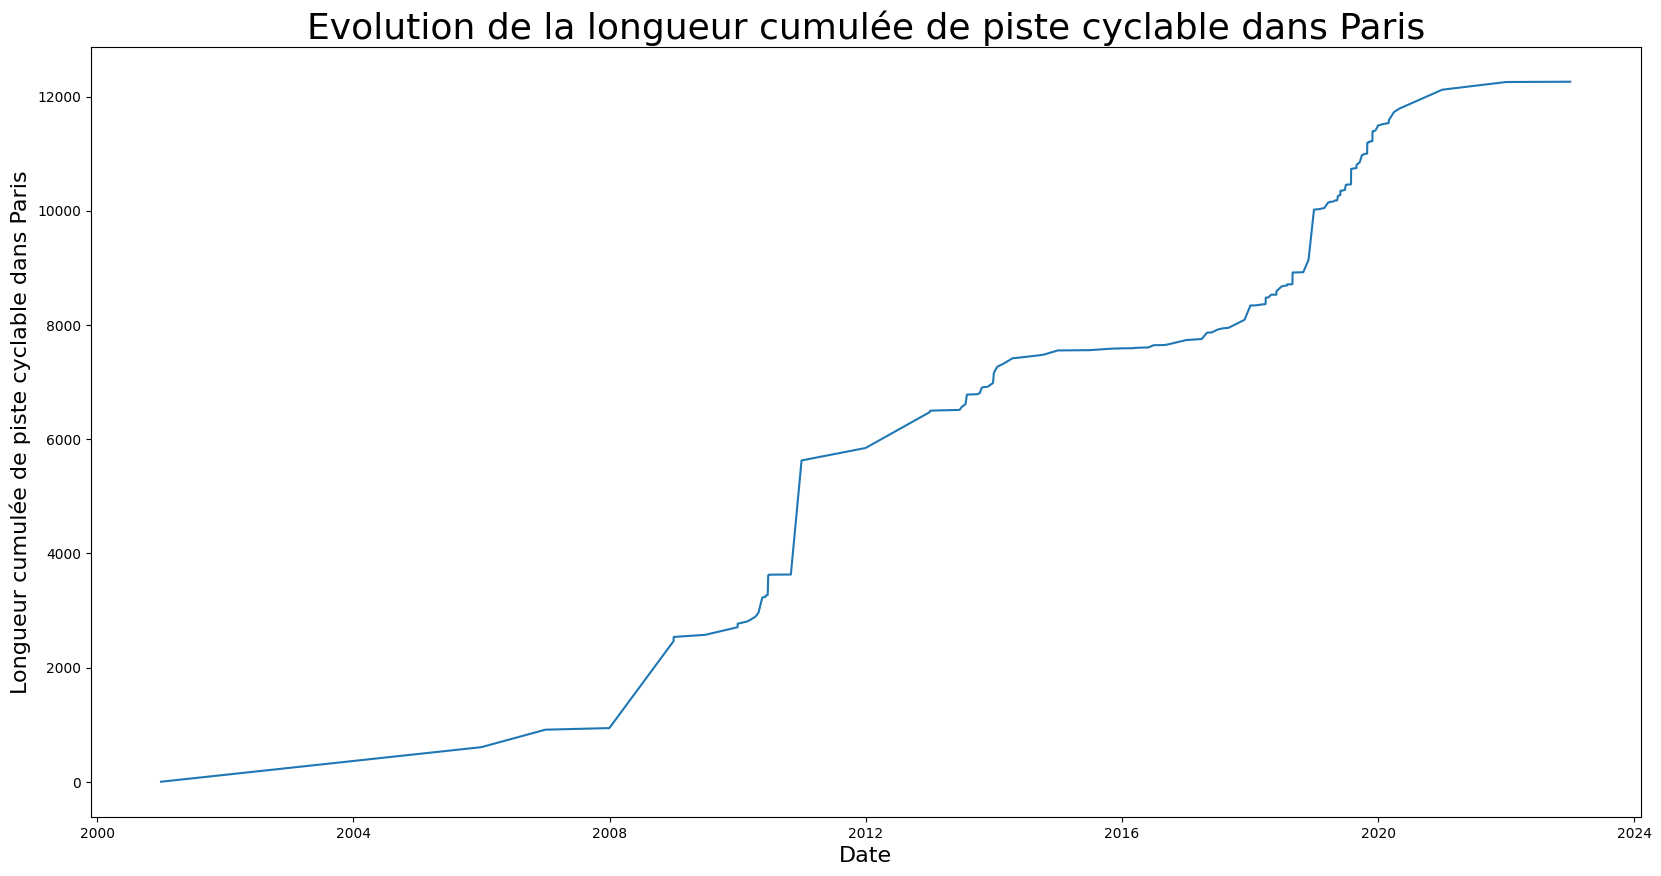

In [63]:
plt.figure(figsize=(20,10))
df_bike_lane_length = bike_lanes_per_date[['total_length','date_de_livraison']].groupby(by=['date_de_livraison'])['total_length'].sum().reset_index()
sns.lineplot(x='date_de_livraison',y='total_length',data=df_bike_lane_length)
plt.xlabel('Date', size= 16)
plt.ylabel('Longueur cumulée de piste cyclable dans Paris', size=16)
plt.title("Evolution de la longueur cumulée de piste cyclable dans Paris", size=26)
plt.show();

           date  total_length  avg_counts
0    2020-01-01           0.0    0.161543
1    2020-01-02           0.0    0.404036
2    2020-01-03           0.0    0.448832
3    2020-01-04           0.0    0.374219
4    2020-01-05           0.0    0.296442
...         ...           ...         ...
1107 2023-01-12           1.0    0.572878
1108 2023-01-13           1.0    0.541505
1109 2023-01-14           1.0    0.261677
1110 2023-01-15           1.0    0.306418
1111 2023-01-16           1.0    0.388890

[1112 rows x 3 columns]


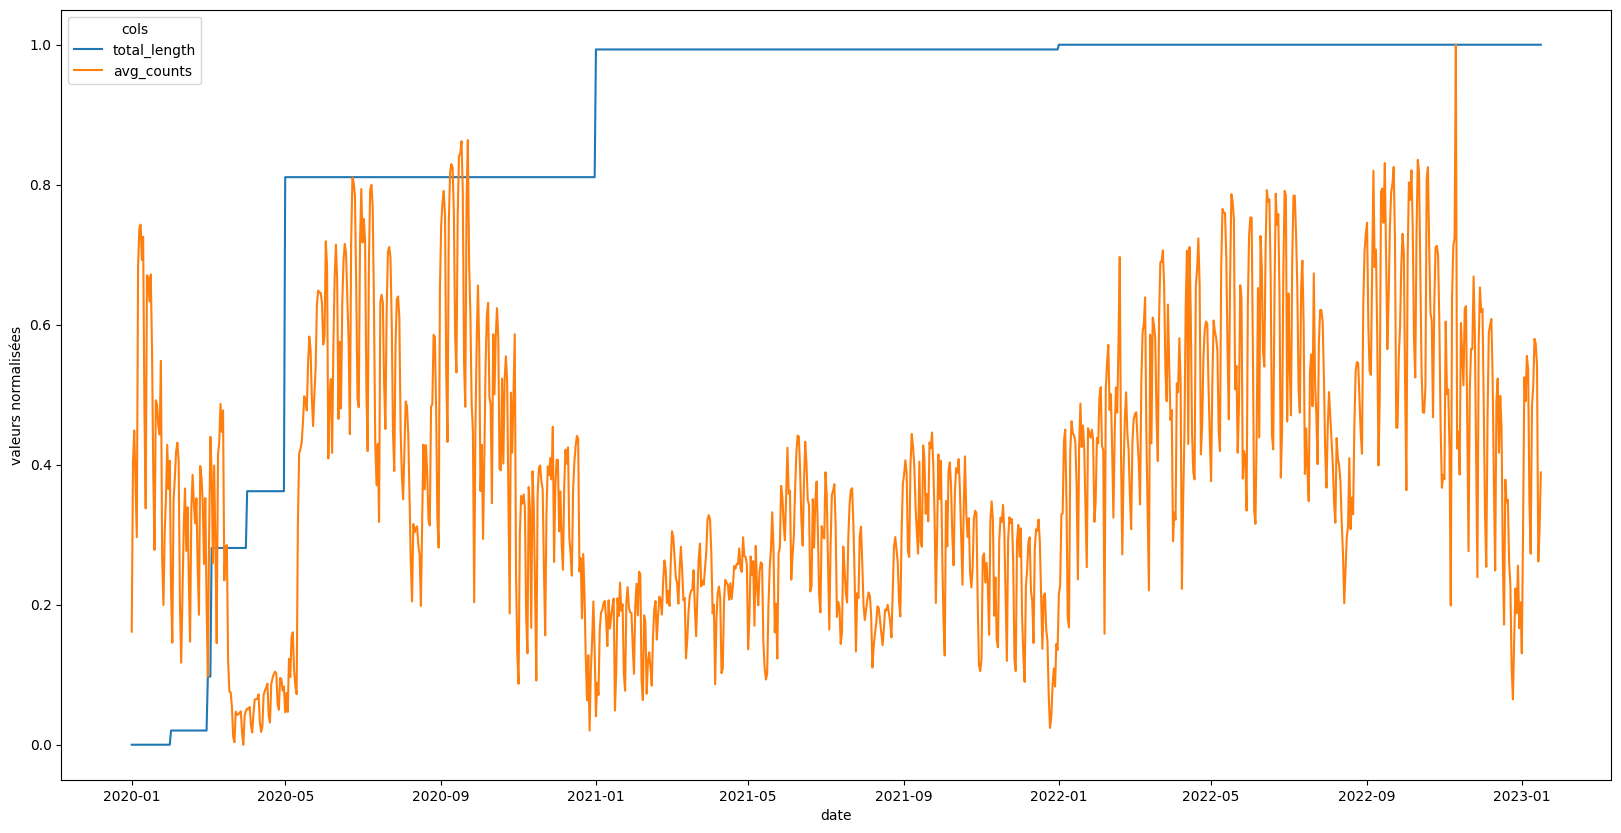

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_traffic_date['date'] = pd.to_datetime(df_traffic_date['date'])
bike_lane_extended = df_traffic_date.merge(df_bike_lane_length,how='left',left_on='date',right_on='date_de_livraison')
bike_lane_extended['total_length'] = bike_lane_extended['total_length'].fillna(method='bfill').fillna(method='ffill')
bike_lane_extended.drop(['date_de_livraison'],axis=1,inplace=True)
bike_lane_extended_scaled = pd.DataFrame(bike_lane_extended['date'])
bike_lane_extended_scaled['total_length'] = scaler.fit_transform(bike_lane_extended['total_length'].values.reshape(-1,1))
bike_lane_extended_scaled['avg_counts'] = scaler.fit_transform(bike_lane_extended['sum_counts'].values.reshape(-1,1))
print(bike_lane_extended_scaled)
df_melt = bike_lane_extended_scaled.melt('date', var_name='cols', value_name='valeurs normalisées')
plt.figure(figsize=(20,10))
sns.lineplot(x="date", y="valeurs normalisées", hue='cols', data=df_melt)
plt.show();

En se plaçant après le covid, le traffic à velo semble avoir augmenté avec l'installation de nouvelles pistes cyclables.
Essayons de vérifier cette hypothèse en caalculant la cross-corrélation entre les deux time series après 2021

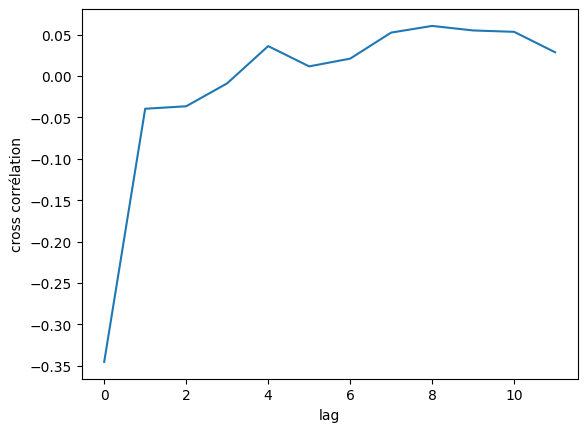

In [129]:
import statsmodels.api as sm
bike_lane_extended = bike_lane_extended[bike_lane_extended['date']>='2021-01-01']
bike_lane_extended['month'] = bike_lane_extended['date'].dt.month
agg_month = bike_lane_extended.groupby('month')[['sum_counts','total_length']].mean().reset_index()
cross_corr = sm.tsa.stattools.ccf(agg_month['total_length'],agg_month['sum_counts'], adjusted=False)
plt.plot(range(len(cross_corr)),cross_corr)
plt.xlabel('lag')
plt.ylabel('cross corrélation')
plt.show();

D'après la cross corrélation, l'ajout de pistes cyclables semble avoir peu d'influence sur le nombre moyen de vélos/heures sur les mois suivants puisque la cross corrélation est proche de 0 en valeur absolue pour les lags supérieurs au lag 0.

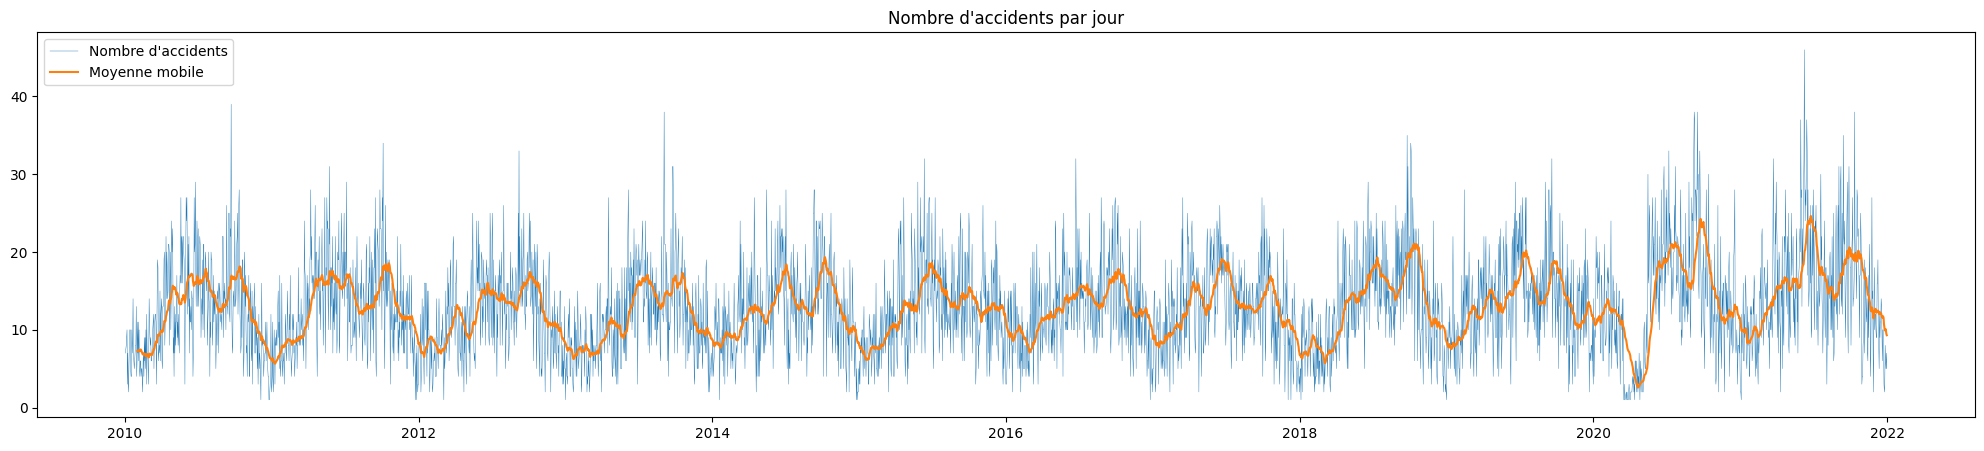

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,5))
plt.plot(df_accidents_velo.groupby('date')['date'].agg(['count']), linewidth=0.3, label="Nombre d'accidents")
plt.plot(df_accidents_velo.groupby('date')['date'].agg(['count']).rolling(window=30).mean(),label='Moyenne mobile')
plt.title("Nombre d'accidents par jour")
plt.legend()
plt.show()

In [44]:
df_accidents_velo.groupby('an')['an'].count()

an
10      4405
11      4732
12      4360
13      4194
14      4565
15      4598
16      4558
17      4682
18      4789
2019    4973
2020    4969
2021    5565
Name: an, dtype: int64

In [45]:
df_paris = df_accidents_velo[df_accidents_velo['dep'].astype(str).isin(departments)]

In [46]:
df_paris.groupby('an')['an'].count()

an
10       606
11       723
12       704
13       771
14       806
15       752
16       858
17       770
18       721
2019     853
2020    1123
2021    1045
Name: an, dtype: int64

<Figure size 640x480 with 0 Axes>

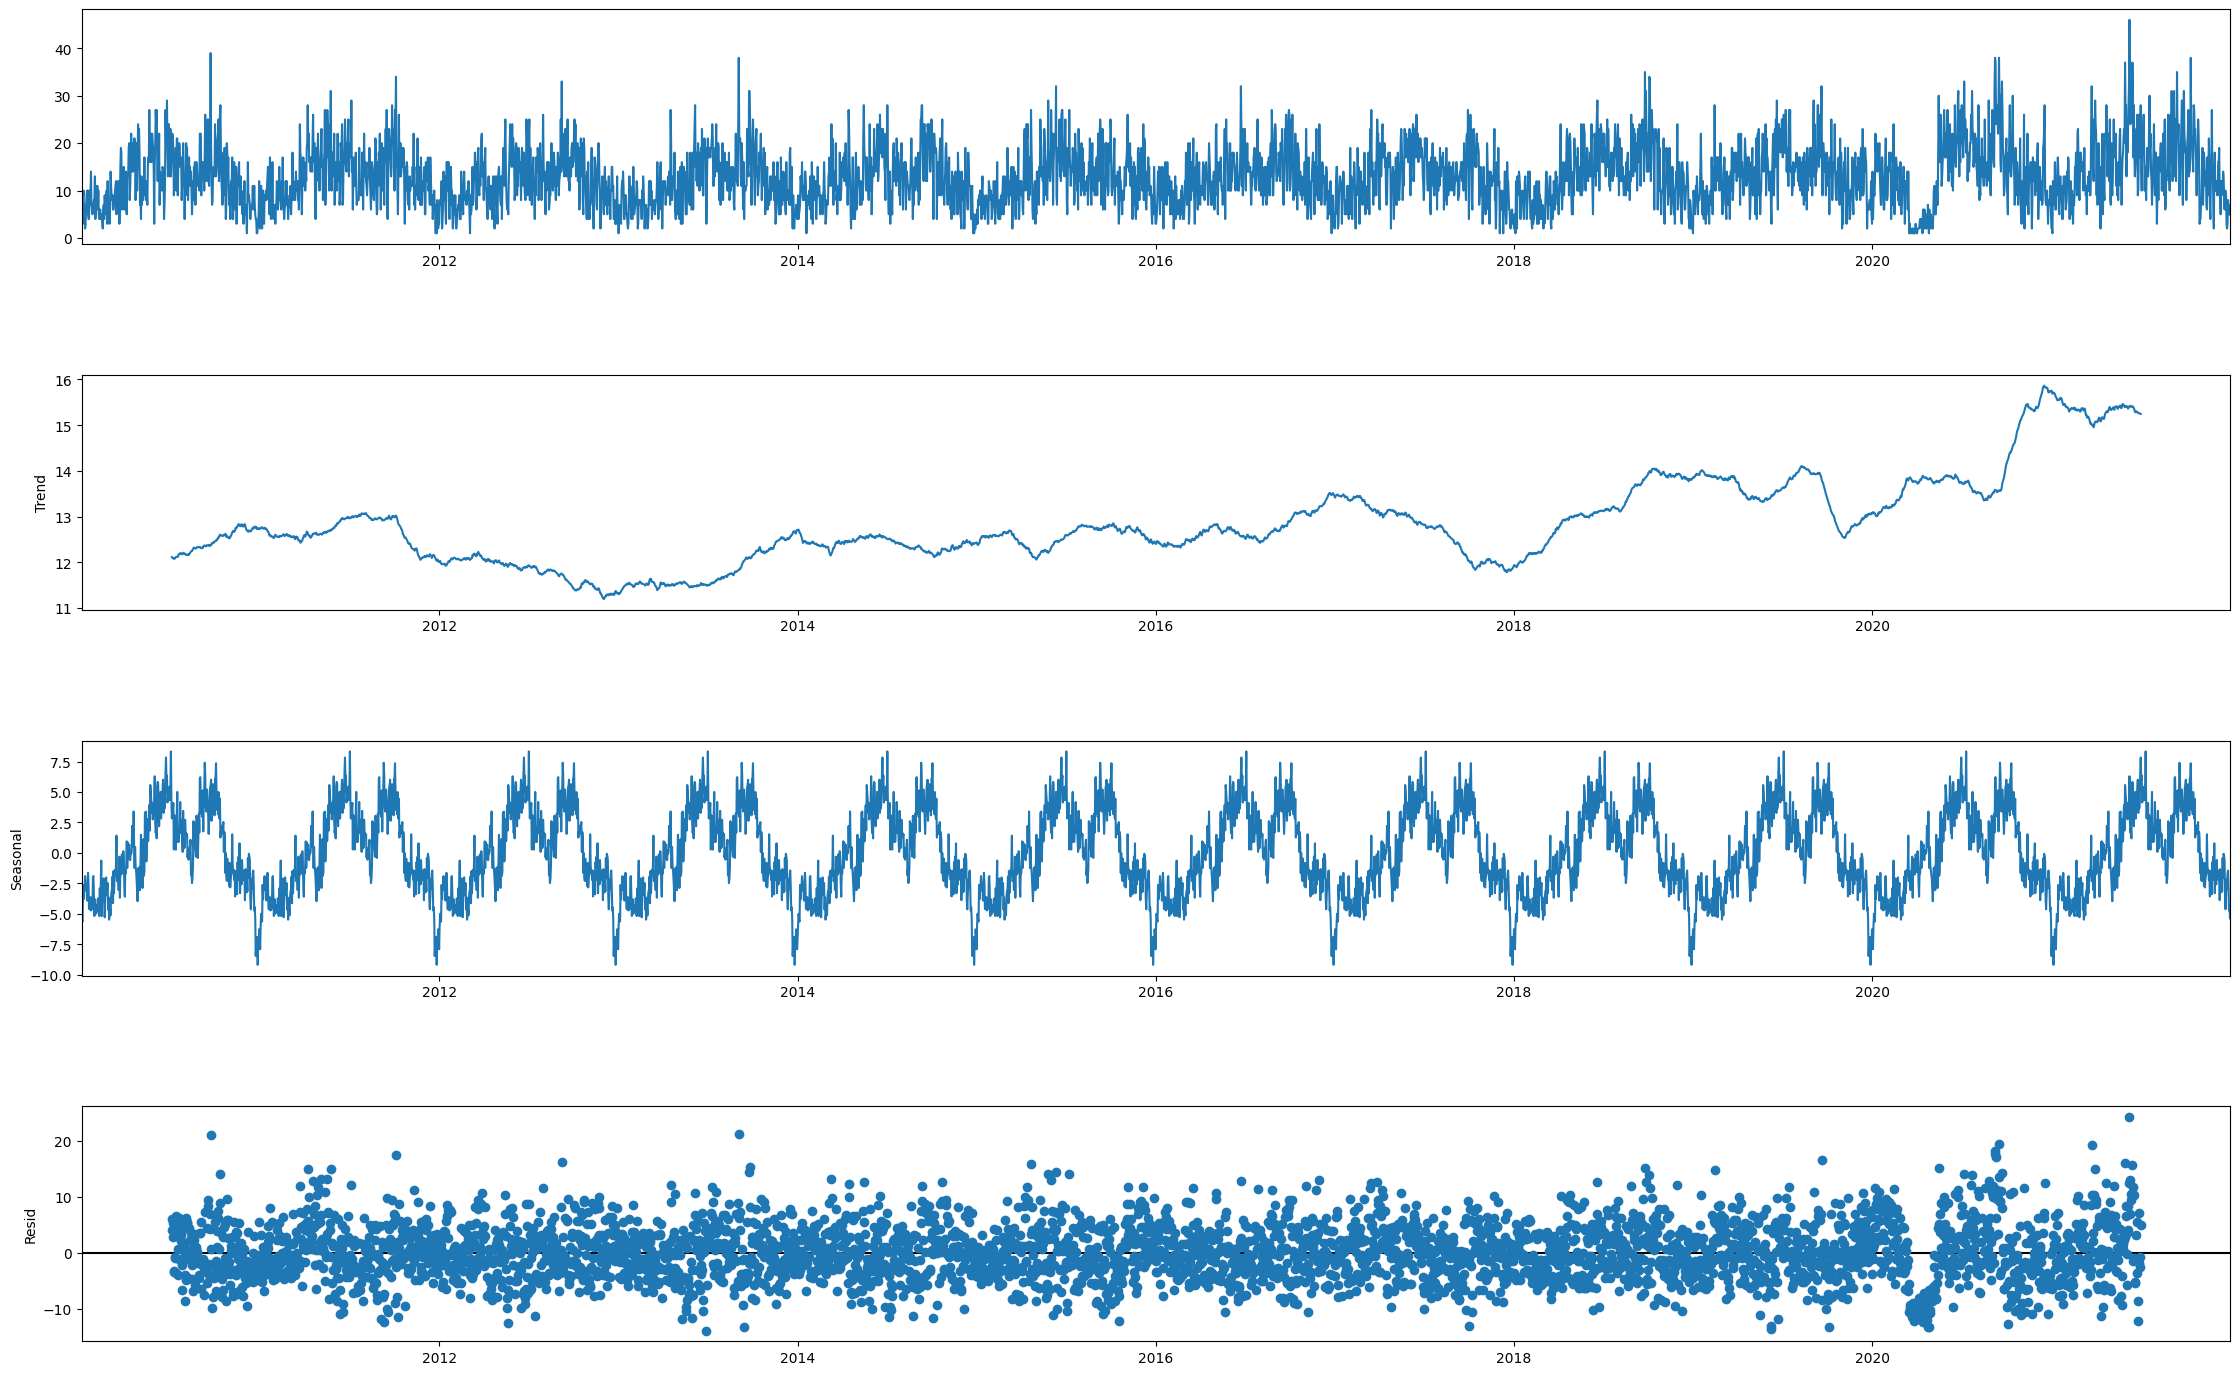

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_accidents_velo.groupby('date')['date'].agg(['count']), period=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(25,15)
plt.show()

/home/romainfournier/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


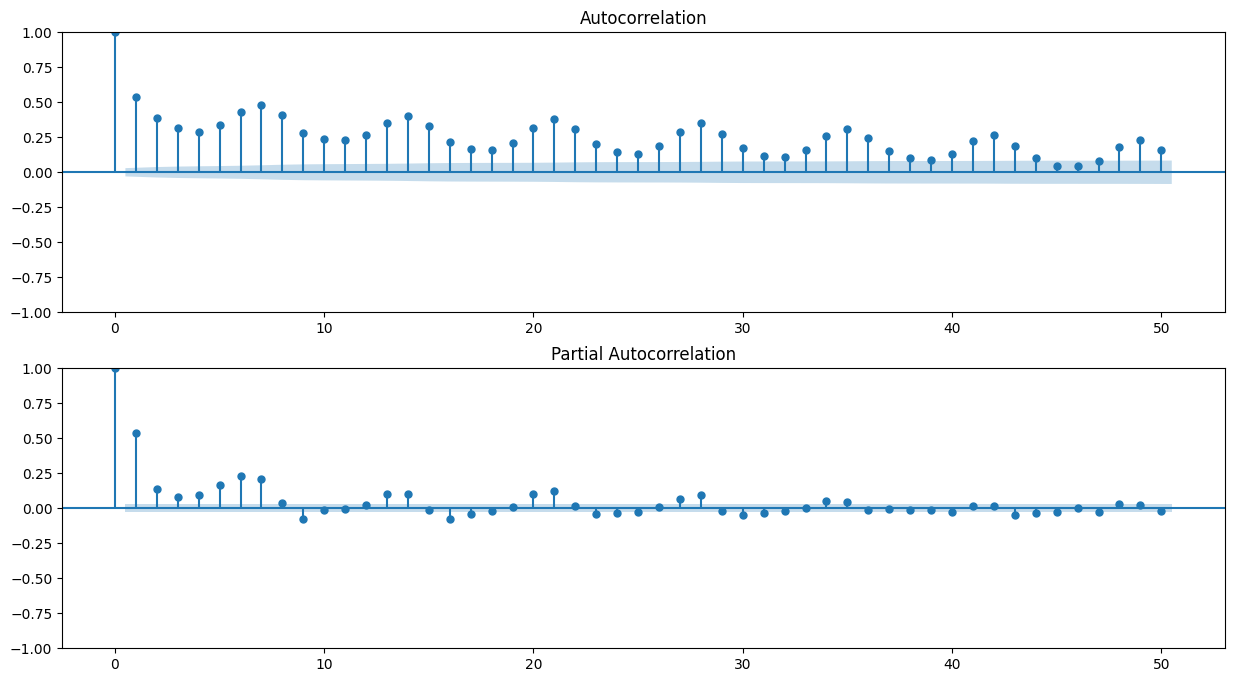

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(15,8))

fig = plot_acf(df_accidents_velo.groupby('date')['date'].agg(['count']), lags=50, ax=axes[0])
fig = plot_pacf(df_accidents_velo.groupby('date')['date'].agg(['count']), lags=50, ax=axes[1])

/tmp/ipykernel_141/3783936528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_accidents_velo.corr())


<AxesSubplot:>

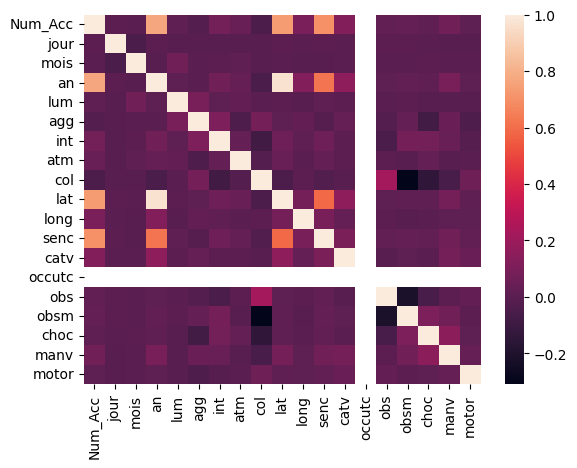

In [54]:
import seaborn as sns
sns.heatmap(df_accidents_velo.corr())